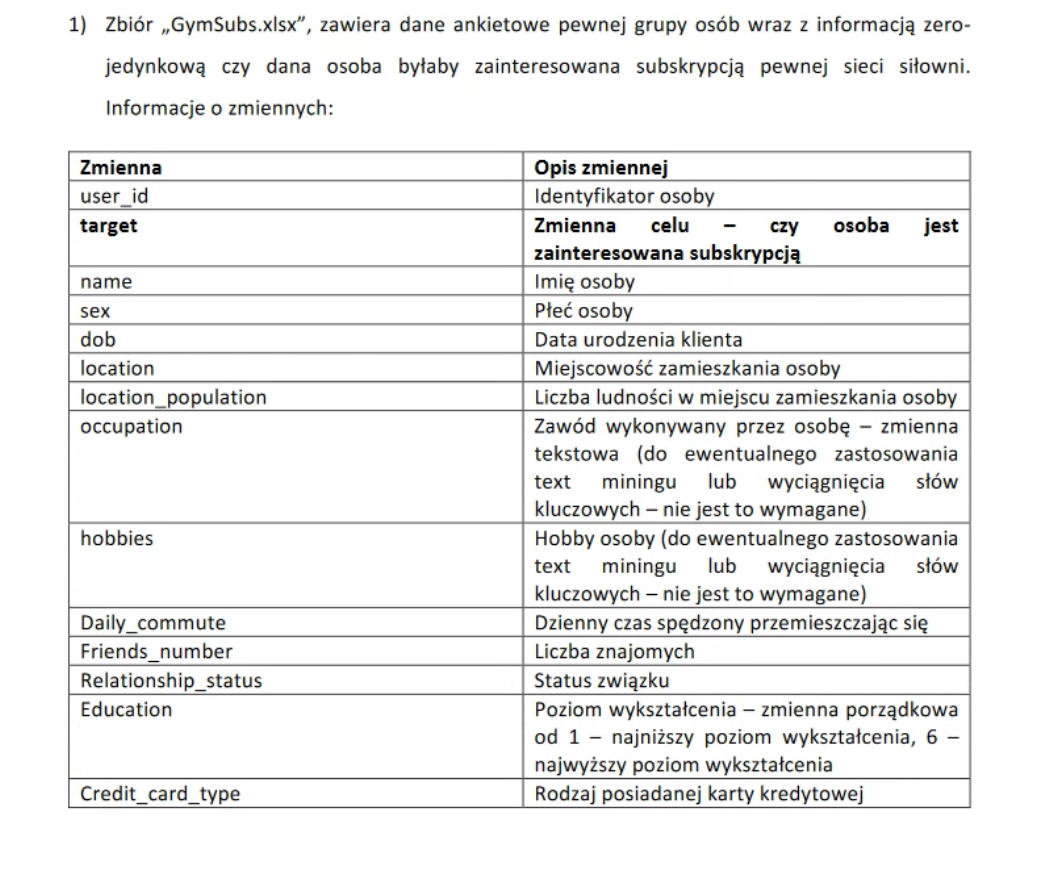
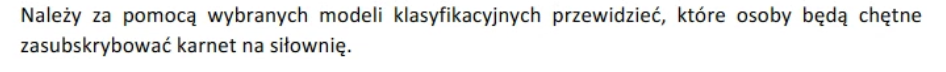
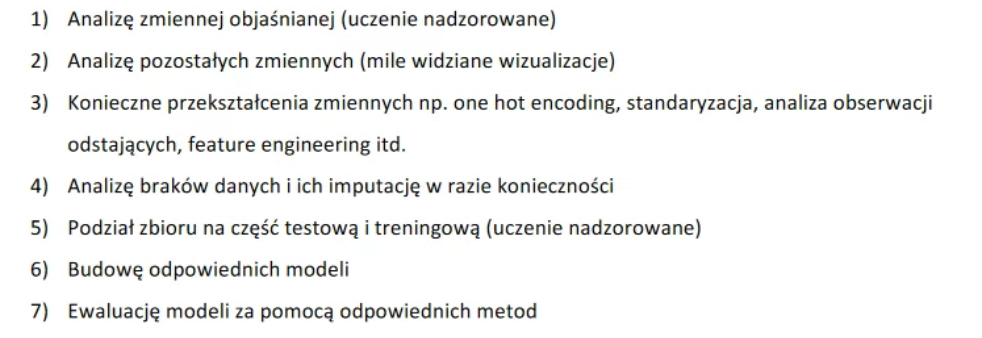

# Import libraries and dataset

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn
# !pip install matplotlib
# !pip install openpyxl
# !pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

We start the analyzed dataset *GymSubs.csv*.

In [3]:
# Importing a dataset
df =  pd.read_excel('data/GymSubs.xlsx').drop(['user_id'], axis=1)

# Descriptive analysis of the data

In [4]:
# Display a preview of the data
df.head()

,target,name,sex,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,1,Halina,NaN,1982-08-07,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,0,Eustachy,male,1971-10-28,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN
3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa
4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN


In [5]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   target               4000 non-null   int64         
 1   name                 3982 non-null   object        
 2   sex                  3616 non-null   object        
 3   dob                  3606 non-null   datetime64[ns]
 4   location             4000 non-null   object        
 5   location_population  4000 non-null   int64         
 6   occupation           4000 non-null   object        
 7   hobbies              3320 non-null   object        
 8   daily_commute        3595 non-null   float64       
 9   friends_number       4000 non-null   int64         
 10  relationship_status  3607 non-null   object        
 11  education            3592 non-null   float64       
 12  credit_card_type     3572 non-null   object        
dtypes: datetime64[ns](1), float64(2),

The dataset consists of 13 variables, eight of which have missing data.

In [6]:
NA = pd.DataFrame(data=[df.notna().sum().tolist(),
            df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (df.isna().sum()/df.shape[0]*100).tolist()]], 
           columns=df.columns, index=['Not NA Count', 'NA Count', 'NA Percent']).transpose()
NA

,Not NA Count,NA Count,NA Percent
target,4000,0,0.00%
name,3982,18,0.45%
sex,3616,384,9.60%
dob,3606,394,9.85%
location,4000,0,0.00%
location_population,4000,0,0.00%
occupation,4000,0,0.00%
hobbies,3320,680,17.00%
daily_commute,3595,405,10.12%
friends_number,4000,0,0.00%


In [7]:
# Basic statistics of numeric columns
df.describe()

,target,dob,location_population,daily_commute,friends_number,education
count,4000.000000,3606,4.000000e+03,3595.000000,4000.000000,3592.000000
mean,0.201500,1979-01-23 11:32:50.715474240,3.105877e+05,50.098748,199.877750,3.670935
min,0.000000,1922-05-27 00:00:00,7.860000e+02,0.000000,0.000000,1.000000
25%,0.000000,1969-06-28 06:00:00,2.435725e+04,25.000000,143.000000,3.000000
50%,0.000000,1979-07-03 12:00:00,8.007200e+04,50.000000,199.000000,4.000000
75%,0.000000,1989-05-05 00:00:00,3.523130e+05,75.000000,256.000000,5.000000
max,1.000000,2001-11-10 00:00:00,1.764615e+06,99.000000,619.000000,6.000000
std,0.401171,NaN,4.878360e+05,28.806060,90.494937,1.327582


In [8]:
# General statistics of qualitative variables
df.describe(include=['O'])

,name,sex,location,occupation,hobbies,relationship_status,credit_card_type
count,3982,3616,4000,4000,3320,3607,3572
unique,208,2,645,43,2745,5,4
top,Franciszek,female,Warszawa,Science and engineering associate professionals,Gym,In relationship,Visa
freq,38,2040,332,106,20,1247,1777


We have 6 categorical variables, three of which have very unique values.

# Target variable

In [9]:
# A look at the variable we are going to predict
df['target'].value_counts()

target
0    3194
1     806
Name: count, dtype: int64

In [10]:
# Representation of the abundance of the explanatory variable in percentage form
df['target'].value_counts(normalize=True)

target
0    0.7985
1    0.2015
Name: proportion, dtype: float64

As you can see, only about 20% of customers are our target. 

<Axes: xlabel='target', ylabel='count'>

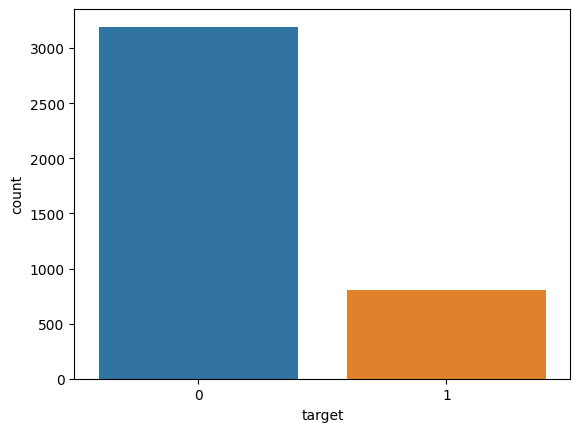

In [11]:
sns.countplot(x = 'target', data=df)

#### Categorical variables

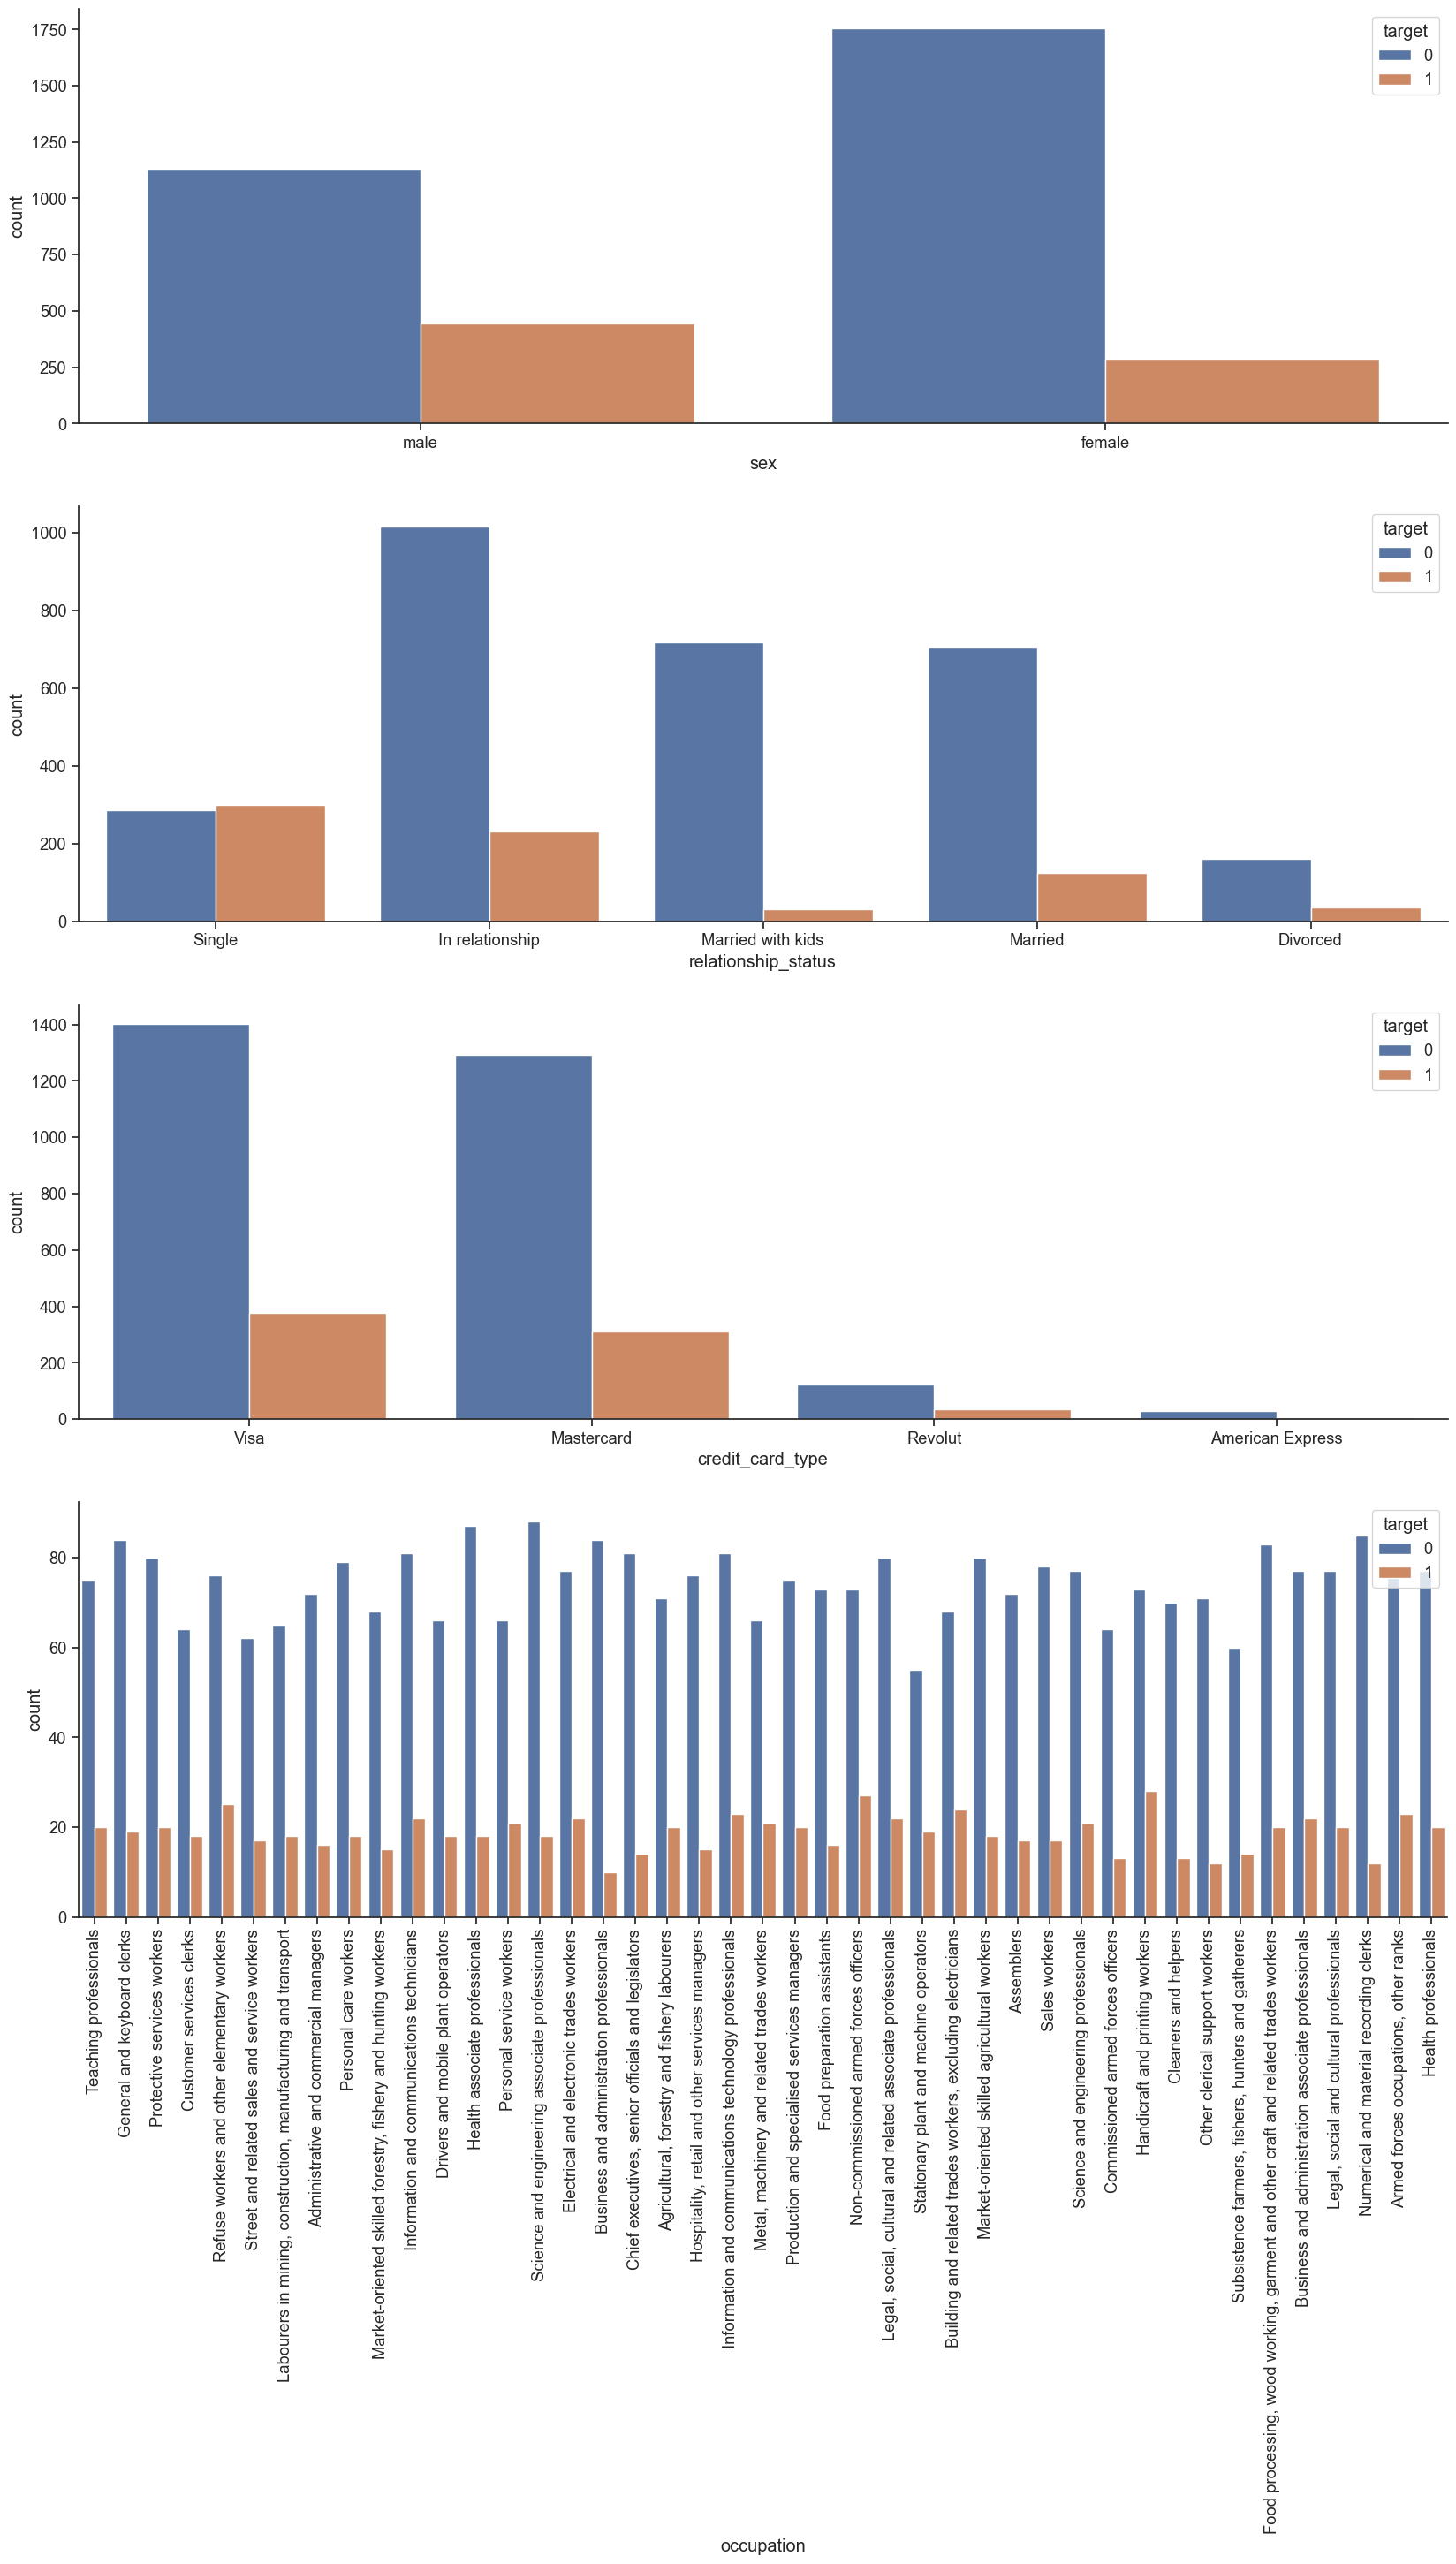

In [12]:
char_cols = ['sex', 'relationship_status', 'credit_card_type', 'occupation']

plt.figure(figsize=(20, 50))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(char_cols):
    plt.subplot(7, 1, i+1)
    ax = sns.countplot(data=df, x=feature, hue='target') 

    if feature == "occupation":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.despine()

# użyć biblioteki warnings (zarzączanie błęami)
#opis

In [13]:
# Share of people who are targeted for each relationship status
df[['relationship_status','target']].groupby(['relationship_status'], as_index=False).mean().sort_values(by='target')

,relationship_status,target
3,Married with kids,0.042724
2,Married,0.149398
0,Divorced,0.178571
1,In relationship,0.185245
4,Single,0.512821


The table above shows that 51% of the people we target are singles

In [14]:
df['relationship_status'].value_counts()

relationship_status
In relationship      1247
Married               830
Married with kids     749
Single                585
Divorced              196
Name: count, dtype: int64

In [15]:
# Share of people who are targeted by sex
df[['sex','target']].groupby(['sex'], as_index=False).mean().sort_values(by='target')

,sex,target
0,female,0.139706
1,male,0.282995


In [16]:
df['sex'].value_counts()

sex
female    2040
male      1576
Name: count, dtype: int64

In [17]:
# Share of people who are targeted by occupation
df[['occupation','target']].groupby(['occupation'], as_index=False).mean().sort_values(by='target')

,occupation,target
6,Business and administration professionals,0.106383
29,Numerical and material recording clerks,0.123711
30,Other clerical support workers,0.144578
7,"Chief executives, senior officials and legisla...",0.147368
8,Cleaners and helpers,0.156627
19,"Hospitality, retail and other services managers",0.164835
9,Commissioned armed forces officers,0.168831
37,Science and engineering associate professionals,0.169811
17,Health associate professionals,0.171429
36,Sales workers,0.178947


In [18]:
df['occupation'].value_counts()

occupation
Science and engineering associate professionals                                      106
Health associate professionals                                                       105
Information and communications technology professionals                              104
General and keyboard clerks                                                          103
Food processing, wood working, garment and other craft and related trades workers    103
Information and communications technicians                                           103
Legal, social, cultural and related associate professionals                          102
Handicraft and printing workers                                                      101
Refuse workers and other elementary workers                                          101
Armed forces occupations, other ranks                                                100
Non-commissioned armed forces officers                                               100
Protective

In [19]:
# Share of people who are targeted by credit card type
df[['credit_card_type','target']].groupby(['credit_card_type'], as_index=False).mean().sort_values(by='target')

,credit_card_type,target
1,Mastercard,0.194011
0,American Express,0.200000
3,Visa,0.211030
2,Revolut,0.229299


In [20]:
df['credit_card_type'].value_counts()

credit_card_type
Visa                1777
Mastercard          1603
Revolut              157
American Express      35
Name: count, dtype: int64

#### Quantitative variables

In [21]:
num_cols = ['location_population', 'daily_commute', 'friends_number', 'education']

C:\Users\Bartosz\AppData\Local\Temp\ipykernel_1220\1305546372.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
C:\Users\Bartosz\AppData\Local\Temp\ipykernel_1220\1305546372.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['target'] == 0], color="red", shade=True)
C:\Users\Bartosz\AppData\Local\Temp\ipykernel_1220\1305546372.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
C:\Users\Bartosz\AppData\Local\Temp\ipykernel_1220\1305546372.py:8: FutureWarning: 

`shade` is now dep

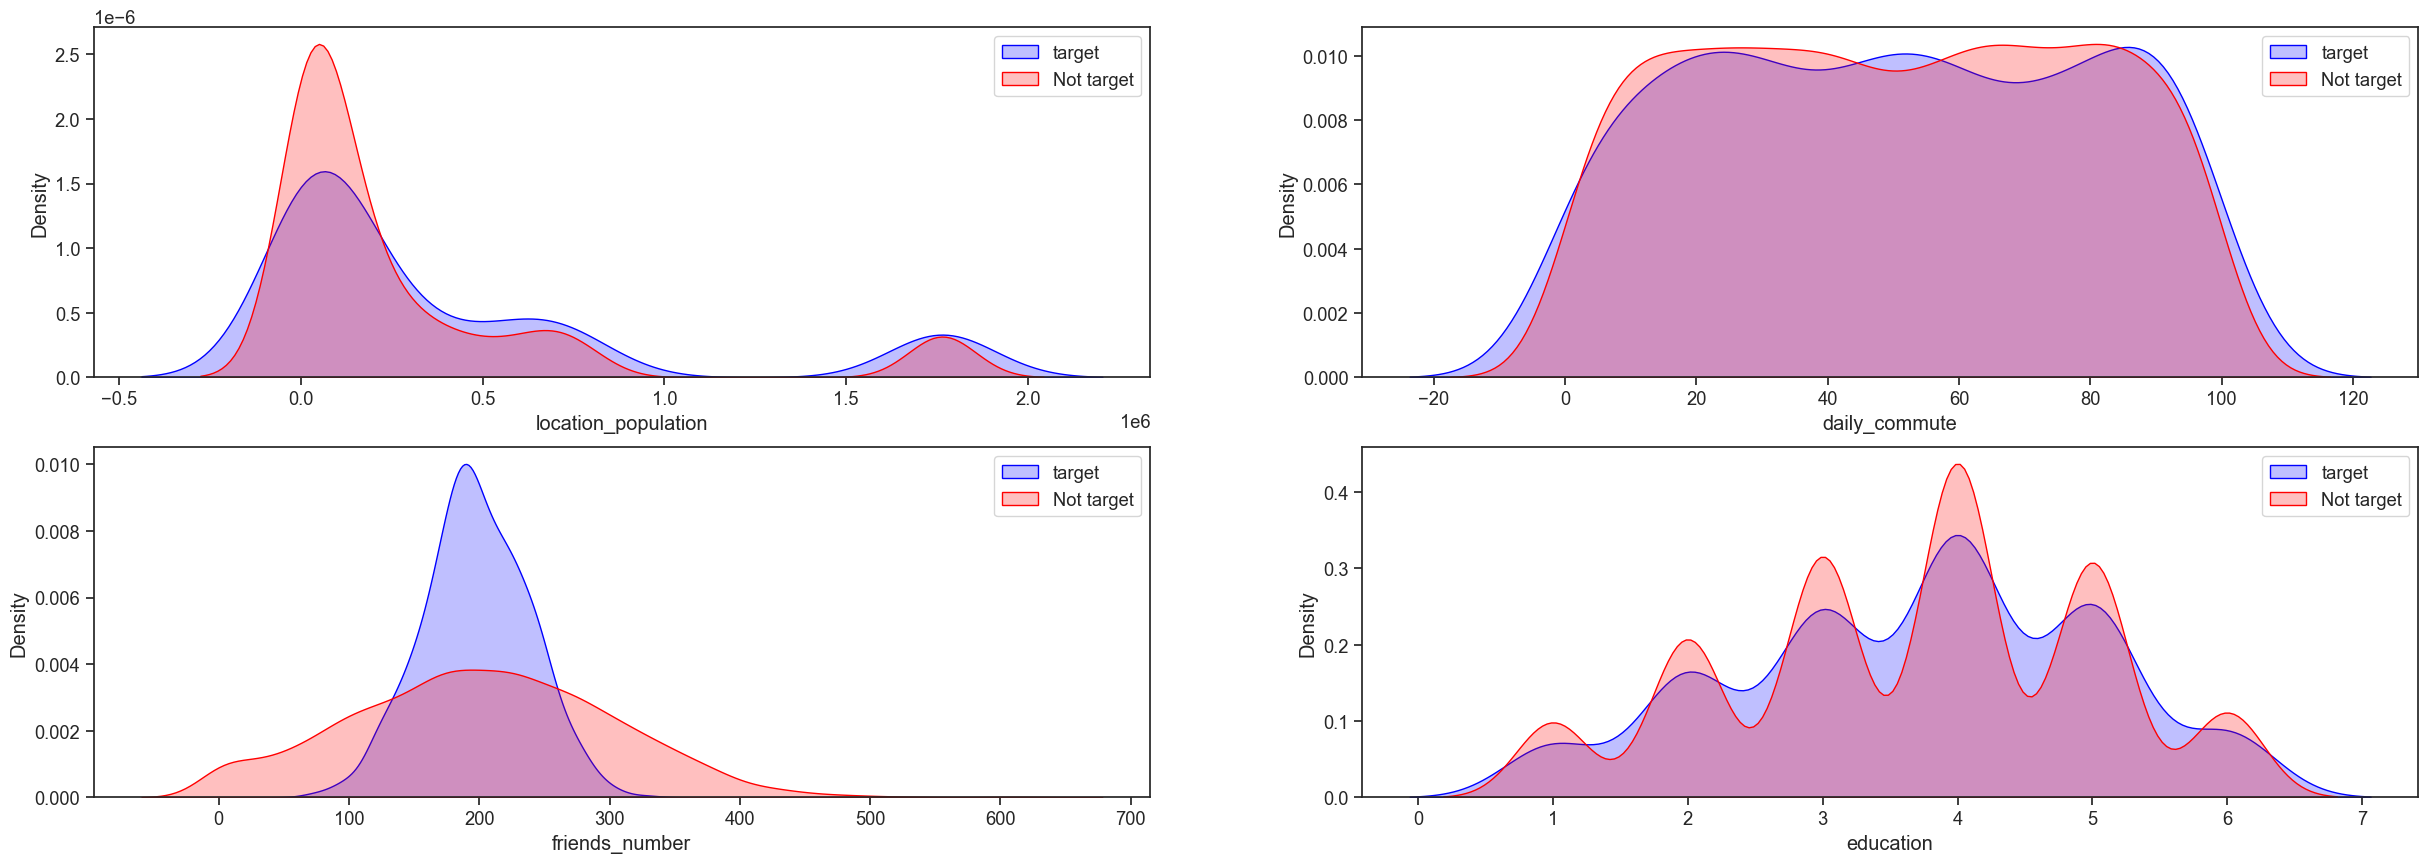

In [22]:
plt.figure(figsize=(30, 10))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
    sns.kdeplot(df[feature][df['target'] == 0], color="red", shade=True)
    plt.legend(['target', 'Not target'])
    ax.set(xlabel=feature)
    # plt.xlim(-10,85) 

# Skalowanie, rozkład, rozsunąć, powiększyć
# interpretacja
# error



### We can observe that the distribution of the number of friends is not equal for targeted and non-targeted people. We can see that we are interested in customers who have between 150 and 250 friends.

In [23]:
# Wartości średnie i mediany zmiennych ilościowych w podziale na zmienną celu
df.groupby('target').agg({'location_population': ['mean', 'median'],
                           'daily_commute': ['mean', 'median'],
                           'friends_number': ['mean', 'median'],
                           'education': ['mean', 'median']})

location_population           daily_commute        friends_number  \
                      mean    median          mean median           mean   
target                                                                     
0            287938.329368   74312.0     50.027206   50.0     200.512210   
1            400341.964020  113621.0     50.380495   50.5     197.363524   

              education         
       median      mean median  
target                          
0       200.0  3.665391    4.0  
1       196.0  3.693166    4.0

# Feature engineering, data cleaning

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [25]:
data = df.copy()

# Tworzenie mapowania
mapping = {'male': 0, 'female': 1}

# Zmiana wartości kolumny 'sex'
data['sex'] = data['sex'].map(mapping)


In [26]:
from datetime import datetime
data['dob'] = datetime.now().year - data['dob'].dt.year

In [27]:
data.drop(['name'], axis=1, inplace=True)

In [28]:
X = data.drop('target',axis=1)
y = data['target']

In [29]:
X

,sex,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,NaN,41.0,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,0.0,52.0,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,NaN,23.0,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN
3,1.0,31.0,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa
4,NaN,48.0,Osieczna,2322,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3995,NaN,39.0,Kraśnik,34821,"Market-oriented skilled forestry, fishery and ...",NaN,1.0,126,Married,5.0,Mastercard
3996,1.0,38.0,Poznań,538633,"Building and related trades workers, excluding...",NaN,65.0,121,Single,2.0,Visa
3997,1.0,57.0,Lubin,72892,Personal service workers,"Photography,Graffiti",79.0,140,Single,4.0,Visa
3998,1.0,52.0,Gdańsk,464254,Handicraft and printing workers,Stretching,30.0,272,Divorced,6.0,Mastercard


In [30]:
# Podział zbioru na część treningową i testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [31]:
y_train.isna().sum()

0

In [32]:
X_train.count()

sex                    2531
dob                    2525
location               2800
location_population    2800
occupation             2800
hobbies                2322
daily_commute          2521
friends_number         2800
relationship_status    2518
education              2501
credit_card_type       2498
dtype: int64

In [33]:
X_train.isna().sum()

sex                    269
dob                    275
location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
relationship_status    282
education              299
credit_card_type       302
dtype: int64

In [34]:
NA = pd.DataFrame(data=[X_train.notna().sum().tolist(),
            X_train.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (X_train.isna().sum()/X_train.shape[0]*100).tolist()]], 
           columns=X_train.columns, index=['Not NA Count', 'NA Count', 'NA Percent']).transpose()
NA

,Not NA Count,NA Count,NA Percent
sex,2531,269,9.61%
dob,2525,275,9.82%
location,2800,0,0.00%
location_population,2800,0,0.00%
occupation,2800,0,0.00%
hobbies,2322,478,17.07%
daily_commute,2521,279,9.96%
friends_number,2800,0,0.00%
relationship_status,2518,282,10.07%
education,2501,299,10.68%


In [35]:
# Sprawdzenie skośności zmiennej sex na zbiorze treningowym
X_train['sex'].skew()

-0.27209941199537774

In [36]:
# Sprawdzenie skośności zmiennej Age na zbiorze testowym
X_test['sex'].skew()

-0.22851523391411618

<Axes: >

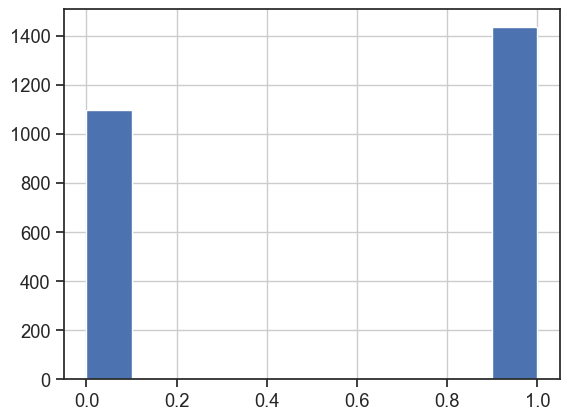

In [37]:
# Histogram zmiennej sex na zbiorze treningowym
X_train['sex'].hist()

<Axes: >

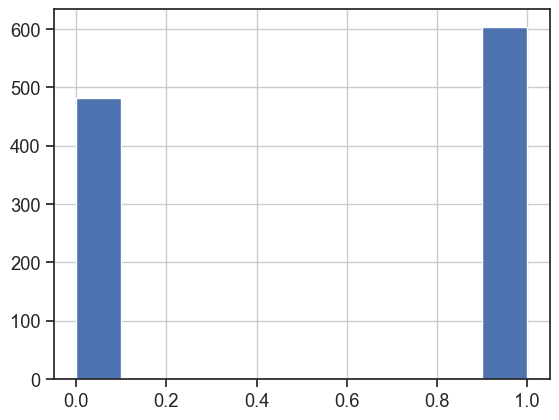

In [38]:
# Histogram zmiennej sex na zbiorze testowym
X_test['sex'].hist()

In [39]:
import scipy.stats

def get_mode(x):
    mode = scipy.stats.mode(x)
    return mode.mode

In [40]:
X_train.groupby(['education', 'relationship_status']).agg({'sex': get_mode})

sex
education relationship_status     
1.0       Divorced             1.0
          In relationship      0.0
          Married              0.0
          Married with kids    1.0
          Single               1.0
2.0       Divorced             0.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               1.0
3.0       Divorced             1.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               0.0
4.0       Divorced             0.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               0.0
5.0       Divorced             1.0
          In relationship      1.0
          Married              0.0
          Married with kids    1.0
          Single               1.0
6.0       Divorced             1.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               0.0

In [41]:
sex_mode = X_train.groupby(['education', 'relationship_status']).agg({'sex': get_mode})
sex_mode

sex
education relationship_status     
1.0       Divorced             1.0
          In relationship      0.0
          Married              0.0
          Married with kids    1.0
          Single               1.0
2.0       Divorced             0.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               1.0
3.0       Divorced             1.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               0.0
4.0       Divorced             0.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               0.0
5.0       Divorced             1.0
          In relationship      1.0
          Married              0.0
          Married with kids    1.0
          Single               1.0
6.0       Divorced             1.0
          In relationship      1.0
          Married              1.0
          Married with kids    1.0
          Single               0.0

In [42]:
sex_mode = sex_mode.reset_index()
sex_mode

,education,relationship_status,sex
0,1.0,Divorced,1.0
1,1.0,In relationship,0.0
2,1.0,Married,0.0
3,1.0,Married with kids,1.0
4,1.0,Single,1.0
5,2.0,Divorced,0.0
6,2.0,In relationship,1.0
7,2.0,Married,1.0
8,2.0,Married with kids,1.0
9,2.0,Single,1.0


In [43]:
sex_agg_all = X.groupby(['education', 'relationship_status']).agg({'sex': get_mode})

In [44]:
sex_agg_all = sex_agg_all.reset_index()
sex_agg_all

,education,relationship_status,sex
0,1.0,Divorced,1.0
1,1.0,In relationship,0.0
2,1.0,Married,1.0
3,1.0,Married with kids,1.0
4,1.0,Single,1.0
5,2.0,Divorced,0.0
6,2.0,In relationship,1.0
7,2.0,Married,1.0
8,2.0,Married with kids,1.0
9,2.0,Single,1.0


In [45]:
X_train = pd.merge(X_train, sex_mode, how='left', on=['education', 'relationship_status'])

In [46]:
X_train.head()

,sex_x,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,sex_y
0,1.0,34.0,Chrzanów,37123,Numerical and material recording clerks,"Stretching,Cooking,Parkour",32.0,268,In relationship,3.0,Visa,1.0
1,0.0,36.0,Konstancin-Jeziorna,17191,Production and specialised services managers,"Squash,Cardio,Astronomy",5.0,204,In relationship,3.0,Mastercard,1.0
2,1.0,23.0,Stalowa Wola,61903,Personal care workers,"Cardio,Power bike,Wood carving,Acting,Rappelling",18.0,128,In relationship,3.0,Visa,1.0
3,1.0,56.0,Braniewo,17074,"Armed forces occupations, other ranks","Bodybuilding,Fitness,Skimboarding",76.0,156,Married with kids,5.0,Visa,1.0
4,0.0,37.0,Sieniawa,2146,General and keyboard clerks,"Cardio,Rowing,Gym,Dowsing",45.0,182,In relationship,5.0,Visa,1.0


In [47]:
X_train['sex'] = np.where(X_train['sex_x'].isna(), X_train['sex_y'].round(), X_train['sex_x'])

In [48]:
X_train.head(10)

,sex_x,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,sex_y,sex
0,1.0,34.0,Chrzanów,37123,Numerical and material recording clerks,"Stretching,Cooking,Parkour",32.0,268,In relationship,3.0,Visa,1.0,1.0
1,0.0,36.0,Konstancin-Jeziorna,17191,Production and specialised services managers,"Squash,Cardio,Astronomy",5.0,204,In relationship,3.0,Mastercard,1.0,0.0
2,1.0,23.0,Stalowa Wola,61903,Personal care workers,"Cardio,Power bike,Wood carving,Acting,Rappelling",18.0,128,In relationship,3.0,Visa,1.0,1.0
3,1.0,56.0,Braniewo,17074,"Armed forces occupations, other ranks","Bodybuilding,Fitness,Skimboarding",76.0,156,Married with kids,5.0,Visa,1.0,1.0
4,0.0,37.0,Sieniawa,2146,General and keyboard clerks,"Cardio,Rowing,Gym,Dowsing",45.0,182,In relationship,5.0,Visa,1.0,0.0
5,1.0,43.0,Zgierz,56690,Science and engineering associate professionals,"Stretching,Power bike,role-playing games,Board...",22.0,247,Single,4.0,NaN,0.0,1.0
6,0.0,58.0,Warszawa,1764615,Customer services clerks,"Gardening,Sand art",50.0,165,Single,3.0,Mastercard,0.0,0.0
7,0.0,44.0,Wieliczka,22946,Non-commissioned armed forces officers,"Stretching,Do it yourself",NaN,166,Single,5.0,Revolut,1.0,0.0
8,1.0,55.0,Wałcz,25533,Food preparation assistants,"Fitness,Candle making,Lego building",14.0,145,Married,4.0,Mastercard,1.0,1.0
9,0.0,56.0,Gdańsk,464254,Personal service workers,"Badminton,Roller skating,Bird watching,tableto...",28.0,390,In relationship,4.0,Visa,1.0,0.0


In [49]:
X_train.drop(['sex_x', 'sex_y'], axis=1, inplace=True)

In [50]:
def fill_missing_with_mode(dataframe, column_name):
    mode_value = dataframe[column_name].mode()[0]  # Obliczanie dominanty dla podanej kolumny
    dataframe[column_name].fillna(mode_value, inplace=True)  # Uzupełnianie brakujących wartości dominantą dla podanej kolumny


In [51]:
fill_missing_with_mode(X_train, 'sex')

In [52]:
X_train.isna().sum()

dob                    275
location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
relationship_status    282
education              299
credit_card_type       302
sex                      0
dtype: int64

We do not see large deviations, so we can see that the data has been correctly imputed

In [53]:
X_train['sex'].describe()

count    2800.000000
mean        0.591429
std         0.491658
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [54]:
X['sex'].describe()

count    3616.000000
mean        0.564159
std         0.495935
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [55]:
def imp_grup(df, group, col, method):

    train = df.groupby(group).agg({col: method}).reset_index()
    # train = train.reset_index()

    agg_all = X.groupby(group).agg({col: method}).reset_index()
    # agg_all = agg_all.reset_index()

    df = pd.merge(df, train, how='left', on=group)

    df[col] = np.where(df[f'{col}_x'].isna(), df[f'{col}_y'], df[f'{col}_x'])

    df.drop([f'{col}_x', f'{col}_y'], axis=1, inplace=True)

    return df

In [56]:
X_train.isna().sum()

dob                    275
location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
relationship_status    282
education              299
credit_card_type       302
sex                      0
dtype: int64

In [57]:
import scipy.stats

def get_mode(x):
    if x.dtype.name != 'object':
        mode = scipy.stats.mode(x)
        if len(mode.mode) > 0:
            return mode.mode[0]
    return None

def imp_grup(df, group, col, method):
    train = df.groupby(group).agg({col: method}).reset_index()
    agg_all = df.groupby(group).agg({col: method}).reset_index()
    df = pd.merge(df, train, how='left', on=group)
    df[col] = np.where(df[f'{col}_x'].isna(), df[f'{col}_y'], df[f'{col}_x'])
    df.drop([f'{col}_x', f'{col}_y'], axis=1, inplace=True)
    return df

X_train = imp_grup(X_train, ['sex', 'education'], 'credit_card_type', get_mode)


In [58]:
X_train.isna().sum()

dob                    275
location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
relationship_status    282
education              299
sex                      0
credit_card_type       302
dtype: int64

In [59]:
X_train = imp_grup(X_train, ['sex', 'education'], 'credit_card_type', get_mode)

In [60]:
fill_missing_with_mode(X_train, 'credit_card_type')

In [61]:
X_train.isna().sum()

dob                    275
location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
relationship_status    282
education              299
sex                      0
credit_card_type         0
dtype: int64

In [62]:
def count_variable_percentage(df, column_name):
    # Calculating the counts of individual variables
    variable_counts = df[column_name].value_counts()

    # Calculating the percentage contribution
    variable_percentages = (variable_counts / len(df)) * 100

    # Creating the result table
    result_table = pd.DataFrame({
        'Variable': variable_counts.index,
        'Count': variable_counts.values,
        'Percentage Share': variable_percentages.values
    })

    # Sorting the table by percentage share in descending order
    result_table = result_table.sort_values(by='Percentage Share', ascending=False)

    return result_table

In [63]:
count_variable_percentage(X_train, 'credit_card_type')

,Variable,Count,Percentage Share
0,Visa,1533,54.750000
1,Mastercard,1136,40.571429
2,Revolut,108,3.857143
3,American Express,23,0.821429


In [64]:
count_variable_percentage(X, 'credit_card_type')

,Variable,Count,Percentage Share
0,Visa,1777,44.425
1,Mastercard,1603,40.075
2,Revolut,157,3.925
3,American Express,35,0.875


In [65]:
X_train = imp_grup(X_train, ['sex', 'education'], 'relationship_status', get_mode)

In [66]:
X_train.dtypes

dob                    float64
location                object
location_population      int64
occupation              object
hobbies                 object
daily_commute          float64
friends_number           int64
education              float64
sex                    float64
credit_card_type        object
relationship_status     object
dtype: object

In [67]:
X_train[['education']] = X_train[['education']].astype(object) # change of data type to object

In [68]:
fill_missing_with_mode(X_train, 'relationship_status')

In [69]:
X_train.isna().sum()

dob                    275
location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
education              299
sex                      0
credit_card_type         0
relationship_status      0
dtype: int64

In [70]:
X_train = imp_grup(X_train, ['sex', 'relationship_status'], 'education', get_mode)

In [71]:
fill_missing_with_mode(X_train, 'education')

In [72]:
X_train.isna().sum()

dob                    275
location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
sex                      0
credit_card_type         0
relationship_status      0
education                0
dtype: int64

In [73]:
X_train = imp_grup(X_train, ['sex', 'relationship_status'], 'dob', 'mean')

In [74]:
X_train.isna().sum()

location                 0
location_population      0
occupation               0
hobbies                478
daily_commute          279
friends_number           0
sex                      0
credit_card_type         0
relationship_status      0
education                0
dob                      0
dtype: int64

In [75]:
X_train = imp_grup(X_train, ['sex', 'relationship_status'], 'daily_commute', 'mean')

Now we only have nan values in the column hobbies

In [76]:
X_train.isna().sum()

location                 0
location_population      0
occupation               0
hobbies                478
friends_number           0
sex                      0
credit_card_type         0
relationship_status      0
education                0
dob                      0
daily_commute            0
dtype: int64

In [77]:
X_train.to_csv("data/for_model.csv")
y_train.to_csv("data/for_model_y.csv")

Data transformation for applying the trained model.

In [78]:
df_tt = X_train.dropna()

hobby_columns = df_tt['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder
hobb = hobby_columns.sum().sort_values(ascending=False)
hobb_100 = hobb[hobb > 100]
part_hobbies = hobby_columns[hobb_100.index]

In [79]:
# xyz = hobb_100.index

In [80]:
# xyz

In [81]:
t_X_train = X_train[X_train.isna().any(axis=1)]
n_X_train = X_train.dropna()

def transform_function(df, n):
    hobby_columns = df['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder
    hobb = hobby_columns.sum().sort_values(ascending=False)
    hobb_100 = hobb[hobb > 100]
    part_hobbies = hobby_columns[hobb_100.index]

    hot_credit_card_type = df['credit_card_type'].str.get_dummies() # Application of one hot encoding
    hot_credit_card_type = hot_credit_card_type.drop(hot_credit_card_type.columns[0], axis=1) # reduction in the number of columns

    hot_relationship_status = df['relationship_status'].str.get_dummies() # Application of one hot encoding
    hot_relationship_status = hot_relationship_status.drop(hot_relationship_status.columns[0], axis=1) # reduction in the number of columns

    df = pd.concat([df, part_hobbies], axis=1)
    df = pd.concat([df, hot_relationship_status], axis=1)
    df = pd.concat([df, hot_credit_card_type], axis=1)

    df = df.drop(columns=['location', 'occupation', 'credit_card_type', 'hobbies', 'relationship_status'])

    if n == True:
        df = df.drop(columns=part_hobbies.columns)

    return df

In [82]:
t_X_train = transform_function(t_X_train, True)
n_X_train = transform_function(n_X_train, False)

In [83]:
import pickle

with open('models/all_trained_hobby_models.pkl', 'rb') as f:
    trained_models = pickle.load(f)

## Checking the results for the training set

In [84]:
# # creation of logistic regression model and fitting to training set
# model = LogisticRegression(random_state=42)
# model.fit(n_X_train, y_train)

# # prediction for training set
# y_pred = model.predict(n_X_train)

In [85]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_train, y_pred)
# print("Prediction precision:", accuracy)

In [86]:
# t_X_train.head() # isna

In [87]:
pred_hobby = pd.DataFrame()

for hobby, model in trained_models.items():
    pred = model.predict(t_X_train)
    pred_hobby[hobby] = pred


In [88]:
t_X_train

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,Mastercard,Revolut,Visa
10,20919,254,1.0,5.0,68.0,64.000000,0,0,1,0,0,0,0
11,89590,341,1.0,5.0,25.0,38.000000,0,0,0,1,0,0,1
12,89590,229,1.0,2.0,53.0,37.000000,0,1,0,0,1,0,0
13,92090,244,0.0,5.0,27.0,21.000000,1,0,0,0,0,0,1
34,168394,267,1.0,2.0,57.0,88.000000,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,1764615,188,0.0,2.0,22.0,5.000000,0,0,0,1,0,0,1
2776,111752,307,1.0,3.0,49.0,50.704293,1,0,0,0,1,0,0
2782,109650,296,1.0,4.0,78.0,46.838235,0,0,0,0,0,0,1
2787,767348,213,1.0,1.0,68.0,50.000000,0,1,0,0,1,0,0


Cration new index that will help join the data

In [89]:
t_X_train.reset_index(inplace=True)

In [90]:
t_X_train.head()

,index,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,Mastercard,Revolut,Visa
0,10,20919,254,1.0,5.0,68.0,64.0,0,0,1,0,0,0,0
1,11,89590,341,1.0,5.0,25.0,38.0,0,0,0,1,0,0,1
2,12,89590,229,1.0,2.0,53.0,37.0,0,1,0,0,1,0,0
3,13,92090,244,0.0,5.0,27.0,21.0,1,0,0,0,0,0,1
4,34,168394,267,1.0,2.0,57.0,88.0,0,1,0,0,0,0,1


Adding prediction to base data.

In [91]:
t_X_train[pred_hobby.columns] = pred_hobby
t_X_train.head()

,index,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,...,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
0,10,20919,254,1.0,5.0,68.0,64.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,11,89590,341,1.0,5.0,25.0,38.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,89590,229,1.0,2.0,53.0,37.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,13,92090,244,0.0,5.0,27.0,21.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,168394,267,1.0,2.0,57.0,88.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Restore the old index

In [92]:
t_X_train.set_index('index', inplace=True)

Joining the data

In [93]:
df_pred_all = pd.concat([t_X_train, n_X_train], axis=0)
df_pred_all.head()

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,...,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
10,20919,254,1.0,5.0,68.0,64.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,89590,341,1.0,5.0,25.0,38.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,89590,229,1.0,2.0,53.0,37.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,92090,244,0.0,5.0,27.0,21.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,168394,267,1.0,2.0,57.0,88.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Index by the definition is unique, because of that we can see that we didn't lose any data

In [94]:
df_pred_all.sort_index(ascending=True)

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,...,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
0,37123,268,1.0,3.0,34.000000,32.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17191,204,0.0,3.0,36.000000,5.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,61903,128,1.0,3.0,23.000000,18.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,17074,156,1.0,5.0,56.000000,76.0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,2146,182,0.0,5.0,37.000000,45.0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,1764615,203,1.0,3.0,55.000000,63.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2796,111752,178,0.0,5.0,70.000000,90.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2797,109021,226,0.0,3.0,36.000000,62.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2798,638586,216,0.0,3.0,45.265734,91.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# X_train = pd.read_csv('data/fitted_data.csv')

In [96]:
X_train_ = df_pred_all.copy() 

In [97]:
X_train_.isna().sum()

location_population    0
friends_number         0
sex                    0
education              0
dob                    0
daily_commute          0
In relationship        0
Married                0
Married with kids      0
Single                 0
Mastercard             0
Revolut                0
Visa                   0
Gym                    0
Squash                 0
Bodybuilding           0
Rowing                 0
Cardio                 0
Weightlifting          0
Badminton              0
Crossfit               0
Fitness                0
Stretching             0
Power bike             0
Kettleballs            0
dtype: int64

## Checking the results for the training set

In [98]:
# creation of logistic regression model and fitting to training set
model = LogisticRegression(random_state=42)
model.fit(X_train_, y_train)

# prediction for training set
y_pred = model.predict(X_train_)

In [99]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print("Prediction precision:", accuracy)

Prediction precision: 0.7971428571428572


In [100]:
X_train_

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,...,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
10,20919,254,1.0,5.0,68.000000,64.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,89590,341,1.0,5.0,25.000000,38.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,89590,229,1.0,2.0,53.000000,37.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,92090,244,0.0,5.0,27.000000,21.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,168394,267,1.0,2.0,57.000000,88.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,403883,254,0.0,3.0,51.000000,81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796,111752,178,0.0,5.0,70.000000,90.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2797,109021,226,0.0,3.0,36.000000,62.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2798,638586,216,0.0,3.0,45.265734,91.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
y_train

2478    0
3531    1
2561    1
1321    0
2405    1
       ..
1921    0
709     0
2487    1
174     0
1146    0
Name: target, Length: 2800, dtype: int64

## Checking the results for the test set

Trzeba zimputować brakujące dane albo odrzucić wszytkie braki na potrzebę testu

In [102]:
prep_test = X_test.copy()
prep_test["target"] = y_test

In [103]:
prep_test.count()

sex                    1085
dob                    1081
location               1200
location_population    1200
occupation             1200
hobbies                 998
daily_commute          1074
friends_number         1200
relationship_status    1089
education              1091
credit_card_type       1074
target                 1200
dtype: int64

In [104]:
# t_X_train = X_train[X_train.isna().any(axis=1)]
prep_test = prep_test.dropna()

In [105]:
prep_test

,sex,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,target
1872,1.0,68.0,Wolbrom,8686,Information and communications technology prof...,"Crossfit,Video gaming,Knitting,Nordic skating",97.0,268,Married with kids,2.0,Mastercard,0
491,0.0,50.0,Szczecin,403883,Street and related sales and service workers,"Shooting,Knife making",32.0,92,Married with kids,5.0,Mastercard,0
328,1.0,50.0,Ząbki,35770,"Food processing, wood working, garment and oth...","Drawing,Mountaineering",72.0,125,Married with kids,6.0,Visa,0
2896,1.0,29.0,Będzin,57343,Protective services workers,"Badminton,Rugby,Board games,scrapbook",42.0,110,Married,3.0,Mastercard,0
3193,0.0,75.0,Pruszków,61237,"Labourers in mining, construction, manufacturi...","Brazilian jiu-jitsu,Pet,Poi",49.0,158,Married,5.0,Mastercard,0
...,...,...,...,...,...,...,...,...,...,...,...,...
830,0.0,36.0,Warszawa,1764615,Refuse workers and other elementary workers,"Sewing,Fishing,Cabaret",38.0,305,Married,4.0,Mastercard,0
2444,1.0,55.0,Gdynia,246306,Non-commissioned armed forces officers,"Stretching,Power bike,Gaming,Juggling,Model bu...",29.0,83,Married with kids,4.0,Mastercard,0
417,1.0,25.0,Oława,32883,Handicraft and printing workers,"Power bike,Cardio,Kettleballs,Knitting,Pottery...",16.0,124,Single,3.0,Visa,1
574,1.0,36.0,Sosnowiec,204013,Customer services clerks,"Bodybuilding,Listening to music",74.0,178,In relationship,3.0,Revolut,1


In [106]:
prep_test.count()

sex                    524
dob                    524
location               524
location_population    524
occupation             524
hobbies                524
daily_commute          524
friends_number         524
relationship_status    524
education              524
credit_card_type       524
target                 524
dtype: int64

In [107]:
prep_test_x = prep_test.drop(columns=["target"])
prep_test_x

prep_test_y = prep_test["target"]
prep_test_y

1872    0
491     0
328     0
2896    0
3193    0
       ..
830     0
2444    0
417     1
574     1
2917    0
Name: target, Length: 524, dtype: int64

Do poprawy funkcja fransformująca

In [108]:


def transform_function(df, n):
    hobby_columns = df['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder
    hobb = hobby_columns.sum().sort_values(ascending=False)
    hobb_100 = hobb[hobb > 100]
    part_hobbies = hobby_columns[hobb_100.index]

    hot_credit_card_type = df['credit_card_type'].str.get_dummies() # Application of one hot encoding
    hot_credit_card_type = hot_credit_card_type.drop(hot_credit_card_type.columns[0], axis=1) # reduction in the number of columns

    hot_relationship_status = df['relationship_status'].str.get_dummies() # Application of one hot encoding
    hot_relationship_status = hot_relationship_status.drop(hot_relationship_status.columns[0], axis=1) # reduction in the number of columns

    df = pd.concat([df, part_hobbies], axis=1)
    df = pd.concat([df, hot_relationship_status], axis=1)
    df = pd.concat([df, hot_credit_card_type], axis=1)

    df = df.drop(columns=['location', 'occupation', 'credit_card_type', 'hobbies', 'relationship_status'])

    if n == True:
        df = df.drop(columns=part_hobbies.columns)

    return df

In [109]:
prep_test_x

,sex,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
1872,1.0,68.0,Wolbrom,8686,Information and communications technology prof...,"Crossfit,Video gaming,Knitting,Nordic skating",97.0,268,Married with kids,2.0,Mastercard
491,0.0,50.0,Szczecin,403883,Street and related sales and service workers,"Shooting,Knife making",32.0,92,Married with kids,5.0,Mastercard
328,1.0,50.0,Ząbki,35770,"Food processing, wood working, garment and oth...","Drawing,Mountaineering",72.0,125,Married with kids,6.0,Visa
2896,1.0,29.0,Będzin,57343,Protective services workers,"Badminton,Rugby,Board games,scrapbook",42.0,110,Married,3.0,Mastercard
3193,0.0,75.0,Pruszków,61237,"Labourers in mining, construction, manufacturi...","Brazilian jiu-jitsu,Pet,Poi",49.0,158,Married,5.0,Mastercard
...,...,...,...,...,...,...,...,...,...,...,...
830,0.0,36.0,Warszawa,1764615,Refuse workers and other elementary workers,"Sewing,Fishing,Cabaret",38.0,305,Married,4.0,Mastercard
2444,1.0,55.0,Gdynia,246306,Non-commissioned armed forces officers,"Stretching,Power bike,Gaming,Juggling,Model bu...",29.0,83,Married with kids,4.0,Mastercard
417,1.0,25.0,Oława,32883,Handicraft and printing workers,"Power bike,Cardio,Kettleballs,Knitting,Pottery...",16.0,124,Single,3.0,Visa
574,1.0,36.0,Sosnowiec,204013,Customer services clerks,"Bodybuilding,Listening to music",74.0,178,In relationship,3.0,Revolut


In [110]:
hobby_columns2 = prep_test_x['hobbies'].str.get_dummies(',')
hobby_columns2

,3D printing,Acting,Air sports,Amateur radio,Archery,Astronomy,BASE jumping,Backpacking,Badminton,Baseball,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
1872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
hobb_100.index

Index(['Gym', 'Squash', 'Bodybuilding', 'Rowing', 'Cardio', 'Weightlifting',
       'Badminton', 'Crossfit', 'Fitness', 'Stretching', 'Power bike',
       'Kettleballs'],
      dtype='object')

In [112]:
part_hobbies = hobby_columns2[hobb_100.index]

In [113]:
part_hobbies

,Gym,Squash,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
1872,0,0,0,0,0,0,0,1,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,0,0
328,0,0,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,1,0,0,0,0,0
3193,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
830,0,0,0,0,0,0,0,0,0,0,0,0
2444,0,0,0,0,0,0,0,0,0,1,1,0
417,0,0,0,0,1,0,0,0,0,0,1,1
574,0,0,1,0,0,0,0,0,0,0,0,0


In [114]:
hot_credit_card_type = prep_test_x['credit_card_type'].str.get_dummies() # Application of one hot encoding
hot_credit_card_type = hot_credit_card_type.drop(hot_credit_card_type.columns[0], axis=1) # reduction in the number of columns

hot_relationship_status = prep_test_x['relationship_status'].str.get_dummies() # Application of one hot encoding
hot_relationship_status = hot_relationship_status.drop(hot_relationship_status.columns[0], axis=1) # reduction in the number of columns

prep_test_x = pd.concat([prep_test_x, part_hobbies], axis=1)
prep_test_x = pd.concat([prep_test_x, hot_relationship_status], axis=1)
prep_test_x = pd.concat([prep_test_x, hot_credit_card_type], axis=1)

prep_test_x = prep_test_x.drop(columns=['location', 'occupation', 'credit_card_type', 'hobbies', 'relationship_status'])

In [115]:
prep_test_x

,sex,dob,location_population,daily_commute,friends_number,education,Gym,Squash,Bodybuilding,Rowing,...,Stretching,Power bike,Kettleballs,In relationship,Married,Married with kids,Single,Mastercard,Revolut,Visa
1872,1.0,68.0,8686,97.0,268,2.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
491,0.0,50.0,403883,32.0,92,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
328,1.0,50.0,35770,72.0,125,6.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2896,1.0,29.0,57343,42.0,110,3.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3193,0.0,75.0,61237,49.0,158,5.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,0.0,36.0,1764615,38.0,305,4.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2444,1.0,55.0,246306,29.0,83,4.0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
417,1.0,25.0,32883,16.0,124,3.0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
574,1.0,36.0,204013,74.0,178,3.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [116]:
# X_test_ = transform_function(prep_test_x, True)

# X_test_

In [117]:
X_train_

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,...,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
10,20919,254,1.0,5.0,68.000000,64.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,89590,341,1.0,5.0,25.000000,38.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,89590,229,1.0,2.0,53.000000,37.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,92090,244,0.0,5.0,27.000000,21.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,168394,267,1.0,2.0,57.000000,88.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,403883,254,0.0,3.0,51.000000,81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796,111752,178,0.0,5.0,70.000000,90.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2797,109021,226,0.0,3.0,36.000000,62.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2798,638586,216,0.0,3.0,45.265734,91.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_train_.columns

Index(['location_population', 'friends_number', 'sex', 'education', 'dob',
       'daily_commute', 'In relationship', 'Married', 'Married with kids',
       'Single', 'Mastercard', 'Revolut', 'Visa', 'Gym', 'Squash',
       'Bodybuilding', 'Rowing', 'Cardio', 'Weightlifting', 'Badminton',
       'Crossfit', 'Fitness', 'Stretching', 'Power bike', 'Kettleballs'],
      dtype='object')

In [119]:
prep_test_x.columns

Index(['sex', 'dob', 'location_population', 'daily_commute', 'friends_number',
       'education', 'Gym', 'Squash', 'Bodybuilding', 'Rowing', 'Cardio',
       'Weightlifting', 'Badminton', 'Crossfit', 'Fitness', 'Stretching',
       'Power bike', 'Kettleballs', 'In relationship', 'Married',
       'Married with kids', 'Single', 'Mastercard', 'Revolut', 'Visa'],
      dtype='object')

Changing the order of columns

In [120]:
prep_test_x = prep_test_x[X_train_.columns]

In [121]:
y_pred_test = model.predict(prep_test_x)

In [122]:
accuracy = accuracy_score(prep_test_y, y_pred_test)
print("Prediction precision:", accuracy)

Prediction precision: 0.816793893129771


In [123]:
X_test_

NameError: name 'X_test_' is not defined

In [ ]:
y_pred_t = model.predict(X_test)

In [ ]:

# predykcja dla zbioru testowego
y_pred = model.predict(X_train)

In [ ]:
# Połączenie X_train i y_train w jednym DataFrame
df2 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

# Usunięcie wierszy zawierających brakujące wartości
df_cleaned = df2.dropna()

# Podział z powrotem na X_train i y_train
X_train = df_cleaned.iloc[:, :-1]
y_train = df_cleaned.iloc[:, -1]

In [ ]:
X_train = X_train[['location_population', 'friends_number', 'sex', 'education', 'dob', 'daily_commute']]

In [ ]:
# Połączenie X_train i y_train w jednym DataFrame
df3 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)

# Usunięcie wierszy zawierających brakujące wartości
df_cleaned = df3.dropna()

# Podział z powrotem na X_train i y_train
X_test = df_cleaned.iloc[:, :-1]
y_test = df_cleaned.iloc[:, -1]

In [ ]:
X_test = X_test[['location_population', 'friends_number', 'sex', 'education', 'dob', 'daily_commute']]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Tworzenie modelu regresji logistycznej
model = LogisticRegression()

# Trenowanie modelu
model.fit(X_train, y_train)

# Dokonanie predykcji
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Dokładność predykcji:", accuracy)

In [ ]:
# Rozdzielanie hobby i tworzenie kolumn
hobby_columns = df['hobbies'].str.get_dummies(',')

# Łączenie nowych kolumn z oryginalnym dataframe
df_encoded = pd.concat([df, hobby_columns], axis=1)

# Wyświetlanie zdekodowanego dataframe
hobby_columns.head()

In [ ]:
hobby_columns.sum().sort_values(ascending=False)

In [ ]:
dfna = df.dropna()
dfna.reset_index(inplace=True)

# skopiować, nie pracować na głównym dataframe

In [ ]:
df.count()

In [ ]:
dfna.count()

In [ ]:
X_train = pd.read_csv('data/fitted_data.csv', index_col = [0])
X_train

In [ ]:
y_train.count()

In [ ]:
# tworzenie modelu regresji logistycznej i dopasowanie do zbioru treningowego
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# predykcja dla zbioru testowego
y_pred = model.predict(X_test)

In [ ]:
y.count()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, pred)
print(r2)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# tworzenie modelu w odzielnym notebooku
# picle - użyć, podele importujemy z odzielnych plików

In [ ]:
# najpierw podział
# potem uzupełnianie anych 


In [ ]:
# podział zbioru na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# tworzenie modelu regresji logistycznej i dopasowanie do zbioru treningowego
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# predykcja dla zbioru testowego
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

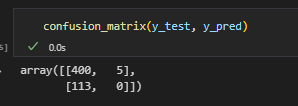
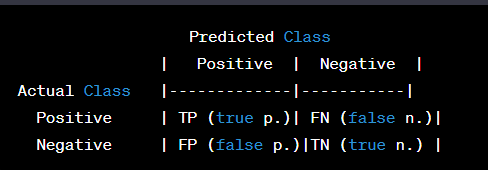

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_percent = np.round(cm * 100, 2)
print(cm_percent)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [ ]:
hobby_columns = df['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder

# Łączenie nowych kolumn z oryginalnym dataframe
df_encoded = pd.concat([df, hobby_columns], axis=1)

# Wyświetlanie zdekodowanego dataframe
df_encoded.head()

We obtained a table that has 174 columns, each of which stands for a different hobby. The number one occurs when a person practices that hobby.

In [ ]:
hobby_columns

In [ ]:
values = hobby_columns.sum().sort_values(ascending=False)
values.head(20)

We can see that Gym also appears as a hobby.  Let's see if people who have Gym as a hobby will be in our target group

In [ ]:
# The number of hobby Gym ozóbes that are targeted.
gym_targrt = df_encoded.loc[(df_encoded['Gym'] == 1) & (df_encoded['target'] == 1)]['target'].sum()
gym_targrt

In [ ]:
print(round(gym_targrt / df_encoded.loc[df_encoded['Gym'] == 1]['Gym'].sum() * 100, 2) % " %")

In [ ]:
df_encoded

In [ ]:
# Modelowanie 

In [ ]:
type(df_encoded)